<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0802_59%EC%9D%BC%EC%B0%A8_ML(bike).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!cp drive/MyDrive/bike_train.csv .

In [3]:
bike_df = pd.read_csv('bike_train.csv')

In [4]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
#datetime을 datetime형태로 변환
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [17]:
#datetime에서 년,월,일,시간으로 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

In [18]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [19]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [20]:
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [27]:
bike_df.count()

season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
count         10886
year          10886
month         10886
day           10886
hour          10886
dtype: int64

In [28]:
bike_df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

#성능 평가 방법 RMSLE(ROOT MEAN SQUARED LOG ERROR)

장점 : 아웃라이어가 있어도 크게 영향 X

상대적 error를 측정 가능

Under Estimation에 큰 페널티 부여

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y, pred)
  mae_val = mean_absolute_error(y, pred)
  print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE: {2:.3f}".format(rmsle_val,rmse_val,mae_val))

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import accuracy_score , roc_auc_score
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 12), (3266, 12), (7620,), (3266,))

In [34]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [38]:
evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE: 105.924


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


In [39]:
#실제값과 예측값이 어느정도 나는지 파악하기

def get_top_error_data(y_test, pred, n_tops=5):
  result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


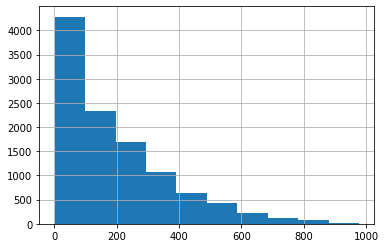

In [40]:
y_target.hist()

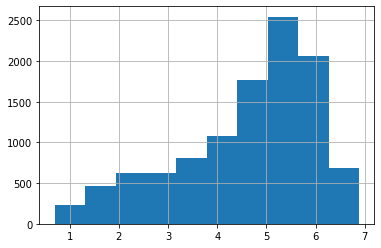

In [41]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [42]:
#타깃 칼럼 count값을 log1p 로그 변환
y_target_log = np.log1p(y_target)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

In [44]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [45]:
y_test_exp = np.expm1(y_test)

In [46]:
pred_exp = np.expm1(pred)

In [47]:
evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE : 162.594, MAE: 109.286


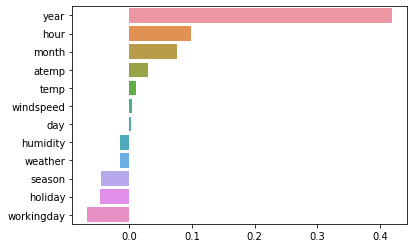

In [49]:
#One Hot Encoding
coef = pd.Series(lr_clf.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending= False)
sns.barplot(x= coef_sort.values, y = coef_sort.index)

In [50]:
X_features_ohe = pd.get_dummies(X_features, columns=['year','month', 'day', 'hour', 'workingday', 'season', 'weather' ])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

In [52]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)

  print("###" , model.__class__.__name__,'###')
  evaluate_regr(y_test, pred)

In [53]:
lr_clf = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha= 0.01)

In [55]:
for model in [lr_clf,ridge_reg,lasso_reg ]:
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.687, MAE: 63.382
### Ridge ###
RMSLE : 0.590, RMSE : 98.528, MAE: 63.893
### Lasso ###
RMSLE : 0.635, RMSE : 113.219, MAE: 72.803


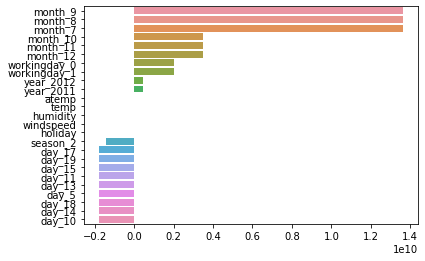

In [57]:
coef = pd.Series(lr_clf.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:25]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [61]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1 = True)

### RandomForestRegressor ###
RMSLE : 0.355, RMSE : 50.228, MAE: 31.165
### GradientBoostingRegressor ###
RMSLE : 0.330, RMSE : 53.323, MAE: 32.737
[00:59:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE : 0.345, RMSE : 58.245, MAE: 35.768
### LGBMRegressor ###
RMSLE : 0.319, RMSE : 47.215, MAE: 29.029


#선생님 방법

In [64]:
bike_df = pd.read_csv('bike_train.csv')

In [65]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [66]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [67]:
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

In [68]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [69]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
  rmse_val = rmse(y, pred)
  mae_val = mean_absolute_error(y, pred)
  print(f'RMSLE : {rmse_val:.3f}, MAE: {mae_val:.3f}')

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [72]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [74]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [75]:
evaluate_regr(y_test, pred)

RMSLE : 140.900, MAE: 105.924


In [78]:
def get_top_error_data(y_test, pred, n_tops=5):
  result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


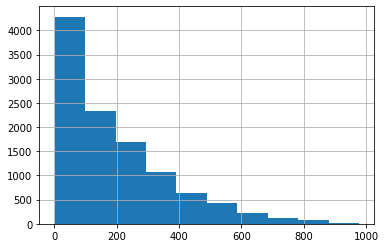

In [79]:
y_target.hist()

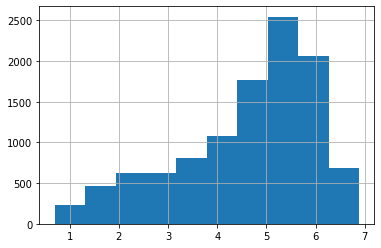

In [80]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [81]:
y_target_log = np.log1p(y_target)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [83]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

In [84]:
evaluate_regr(y_test_exp, pred_exp)

RMSLE : 162.594, MAE: 109.286


In [85]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending=False)

In [86]:
coef_sort

year          0.418513
hour          0.098348
month         0.076839
atemp         0.030857
temp          0.011712
windspeed     0.003961
day           0.003353
humidity     -0.014512
weather      -0.014733
season       -0.044525
holiday      -0.046010
workingday   -0.066383
dtype: float64

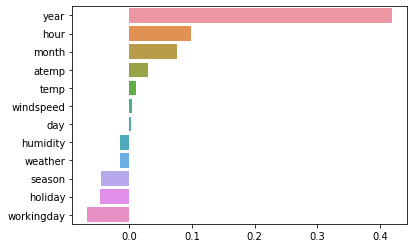

In [88]:
sns.barplot(x = coef_sort.values, y = coef_sort.index)

OneHot encoding : get_dummies

In [89]:
season = pd.DataFrame({'season':['spring', 'summer', 'fall', 'winter', np.nan]})

In [90]:
season

,season
0,spring
1,summer
2,fall
3,winter
4,NaN


In [91]:
pd.get_dummies(season['season'])

,fall,spring,summer,winter
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,0


In [92]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'hour', 'holiday',
                                                     'workingday', 'season', 'weather'])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, 
                                                    test_size=0.3, random_state=0)

In [95]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha= 0.01)

In [97]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 == True :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)

  print("###" , model.__class__.__name__,'###') #클래스 이름
  evaluate_regr(y_test, pred)

In [98]:
for model in [lr_reg, ridge_reg, lasso_reg]:
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 97.483, MAE: 63.106
### Ridge ###
RMSLE : 98.407, MAE: 63.648
### Lasso ###
RMSLE : 113.031, MAE: 72.658


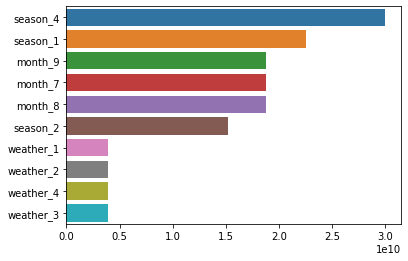

In [99]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y= coef_sort.index)

In [100]:
!cp drive/MyDrive/house_price_train.csv .

In [101]:
house_df_org = pd.read_csv('house_price_train.csv')

In [102]:
house_df_org.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
house_df_org.shape

(1460, 81)

In [104]:
house_df_org.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [106]:
#결측이 많음
house_df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


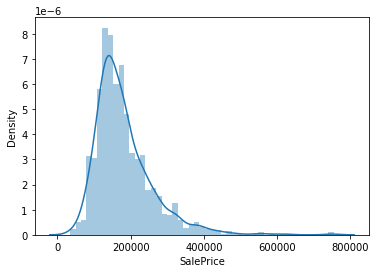

In [107]:
sns.distplot(house_df_org['SalePrice'])

1. 타겟 로그변환해서 해보기

2. Null이 20%dltkd (146*2=292) 있는 칼럼, ID칼럼 삭제 Null은 각 칼럼의 평균값으로 대체

3. 문자형 자료들 -> 원핫 인코딩 처리

4. 릿지, 라소, LR회귀

5. Cross_val_score

6. 회귀계수 그래프 그리기

7. GridSearchCV 사용

ridge_params = {'alpha' : [0.05, 0.1, 1, 8,10, 12, 15,20]}

lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5,1.5, 10]}